# Loading the data
Make sure the CSV files provided by Zindi are in the same folder as this notebook. If it's running on Google Colab, you can use the 'files' tab on the left to upload them. We load the training data from Train.csv, and print out the variable descriptions here for easy reference. 

In [18]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import boxcox
import eli5

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('data/Train.csv')
df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_households   2822 non-null   float64
 2   total_individuals  2822 non-null   float64
 3   target             2822 non-null   float64
 4   dw_00              2822 non-null   float64
 5   dw_01              2822 non-null   float64
 6   dw_02              2822 non-null   float64
 7   dw_03              2822 non-null   float64
 8   dw_04              2822 non-null   float64
 9   dw_05              2822 non-null   float64
 10  dw_06              2822 non-null   float64
 11  dw_07              2822 non-null   float64
 12  dw_08              2822 non-null   float64
 13  dw_09              2822 non-null   float64
 14  dw_10              2822 non-null   float64
 15  dw_11              2822 non-null   float64
 16  dw_12              2822 

In [4]:
df.describe()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,...,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.0,2822.000000,2822.000000,2822.000000
mean,3665.281214,12869.130053,24.507554,0.712196,0.092616,0.032043,0.006057,0.008665,0.006289,0.022375,...,0.127555,0.041589,0.019655,0.011008,0.110818,0.0,0.0,-26.880740,28.666515,17.437560
std,3266.364522,9696.690518,10.294387,0.214035,0.182852,0.080253,0.019374,0.030697,0.024606,0.037127,...,0.156400,0.057331,0.032926,0.023672,0.185401,0.0,0.0,2.021279,2.373809,18.958621
min,1.000000,402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-32.490089,16.760022,0.000000
25%,1778.858235,7071.205695,16.751556,0.594212,0.002895,0.002407,0.000000,0.000000,0.000000,0.002716,...,0.008673,0.002099,0.000715,0.000159,0.005217,0.0,0.0,-28.569019,27.707932,3.033397
50%,2398.249935,9366.989680,24.156670,0.766841,0.010425,0.005762,0.000807,0.000607,0.000865,0.008639,...,0.069065,0.016496,0.005164,0.001459,0.025165,0.0,0.0,-26.549866,28.959679,9.205572
75%,3987.080563,14241.233015,32.226553,0.881708,0.068209,0.027913,0.002538,0.002225,0.003027,0.025218,...,0.183384,0.058626,0.025055,0.009432,0.116638,0.0,0.0,-25.572130,30.441505,26.890531
max,39684.942130,91716.746370,55.528423,0.994962,0.931490,0.951806,0.264239,0.392085,0.435912,0.412936,...,1.000000,0.327393,0.306787,0.228261,0.961523,0.0,0.0,-22.331267,32.858249,63.000000


Drop a number of features (see NB on linear regression for explanation)
Final features to include: 

['pw_00', 'pw_01', 'psa_00', 'psa_01', 'car_00', 'lln_00', 'stv_00', 'pg_00', 'pg_03', 'lan_00', 'lan_01', 'target']

In [31]:
# drop features
feature_list = ['pw_00', 'pw_01', 'psa_00', 'psa_01', 'car_00', 'lln_00', 'stv_00', 'pg_00', 'pg_03', 'lan_00', 'lan_01', 'target']
df_final = df[feature_list]
df_final.head()

,pw_00,pw_01,psa_00,psa_01,car_00,lln_00,stv_00,pg_00,pg_03,lan_00,lan_01,target
0,0.742692,0.214027,0.260191,0.607898,0.273727,0.118825,0.283468,0.357455,0.072996,0.832913,0.012336,16.773757
1,0.309294,0.576844,0.290228,0.549788,0.144638,0.066903,0.103641,0.698428,0.015835,0.879655,0.008445,21.496661
2,0.323393,0.483376,0.186435,0.677005,0.272220,0.100009,0.165772,0.672452,0.167494,0.565546,0.015991,10.931425
3,0.677437,0.314194,0.281229,0.593281,0.127875,0.029155,0.087768,0.728014,0.000956,0.743812,0.006530,23.119257
4,0.771106,0.194743,0.196687,0.517578,0.404507,0.133552,0.345975,0.753491,0.106953,0.422623,0.014352,13.652252


In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pw_00   2822 non-null   float64
 1   pw_01   2822 non-null   float64
 2   psa_00  2822 non-null   float64
 3   psa_01  2822 non-null   float64
 4   car_00  2822 non-null   float64
 5   lln_00  2822 non-null   float64
 6   stv_00  2822 non-null   float64
 7   pg_00   2822 non-null   float64
 8   pg_03   2822 non-null   float64
 9   lan_00  2822 non-null   float64
 10  lan_01  2822 non-null   float64
 11  target  2822 non-null   float64
dtypes: float64(12)
memory usage: 264.7 KB


In [10]:
df_final.shape

(2822, 12)

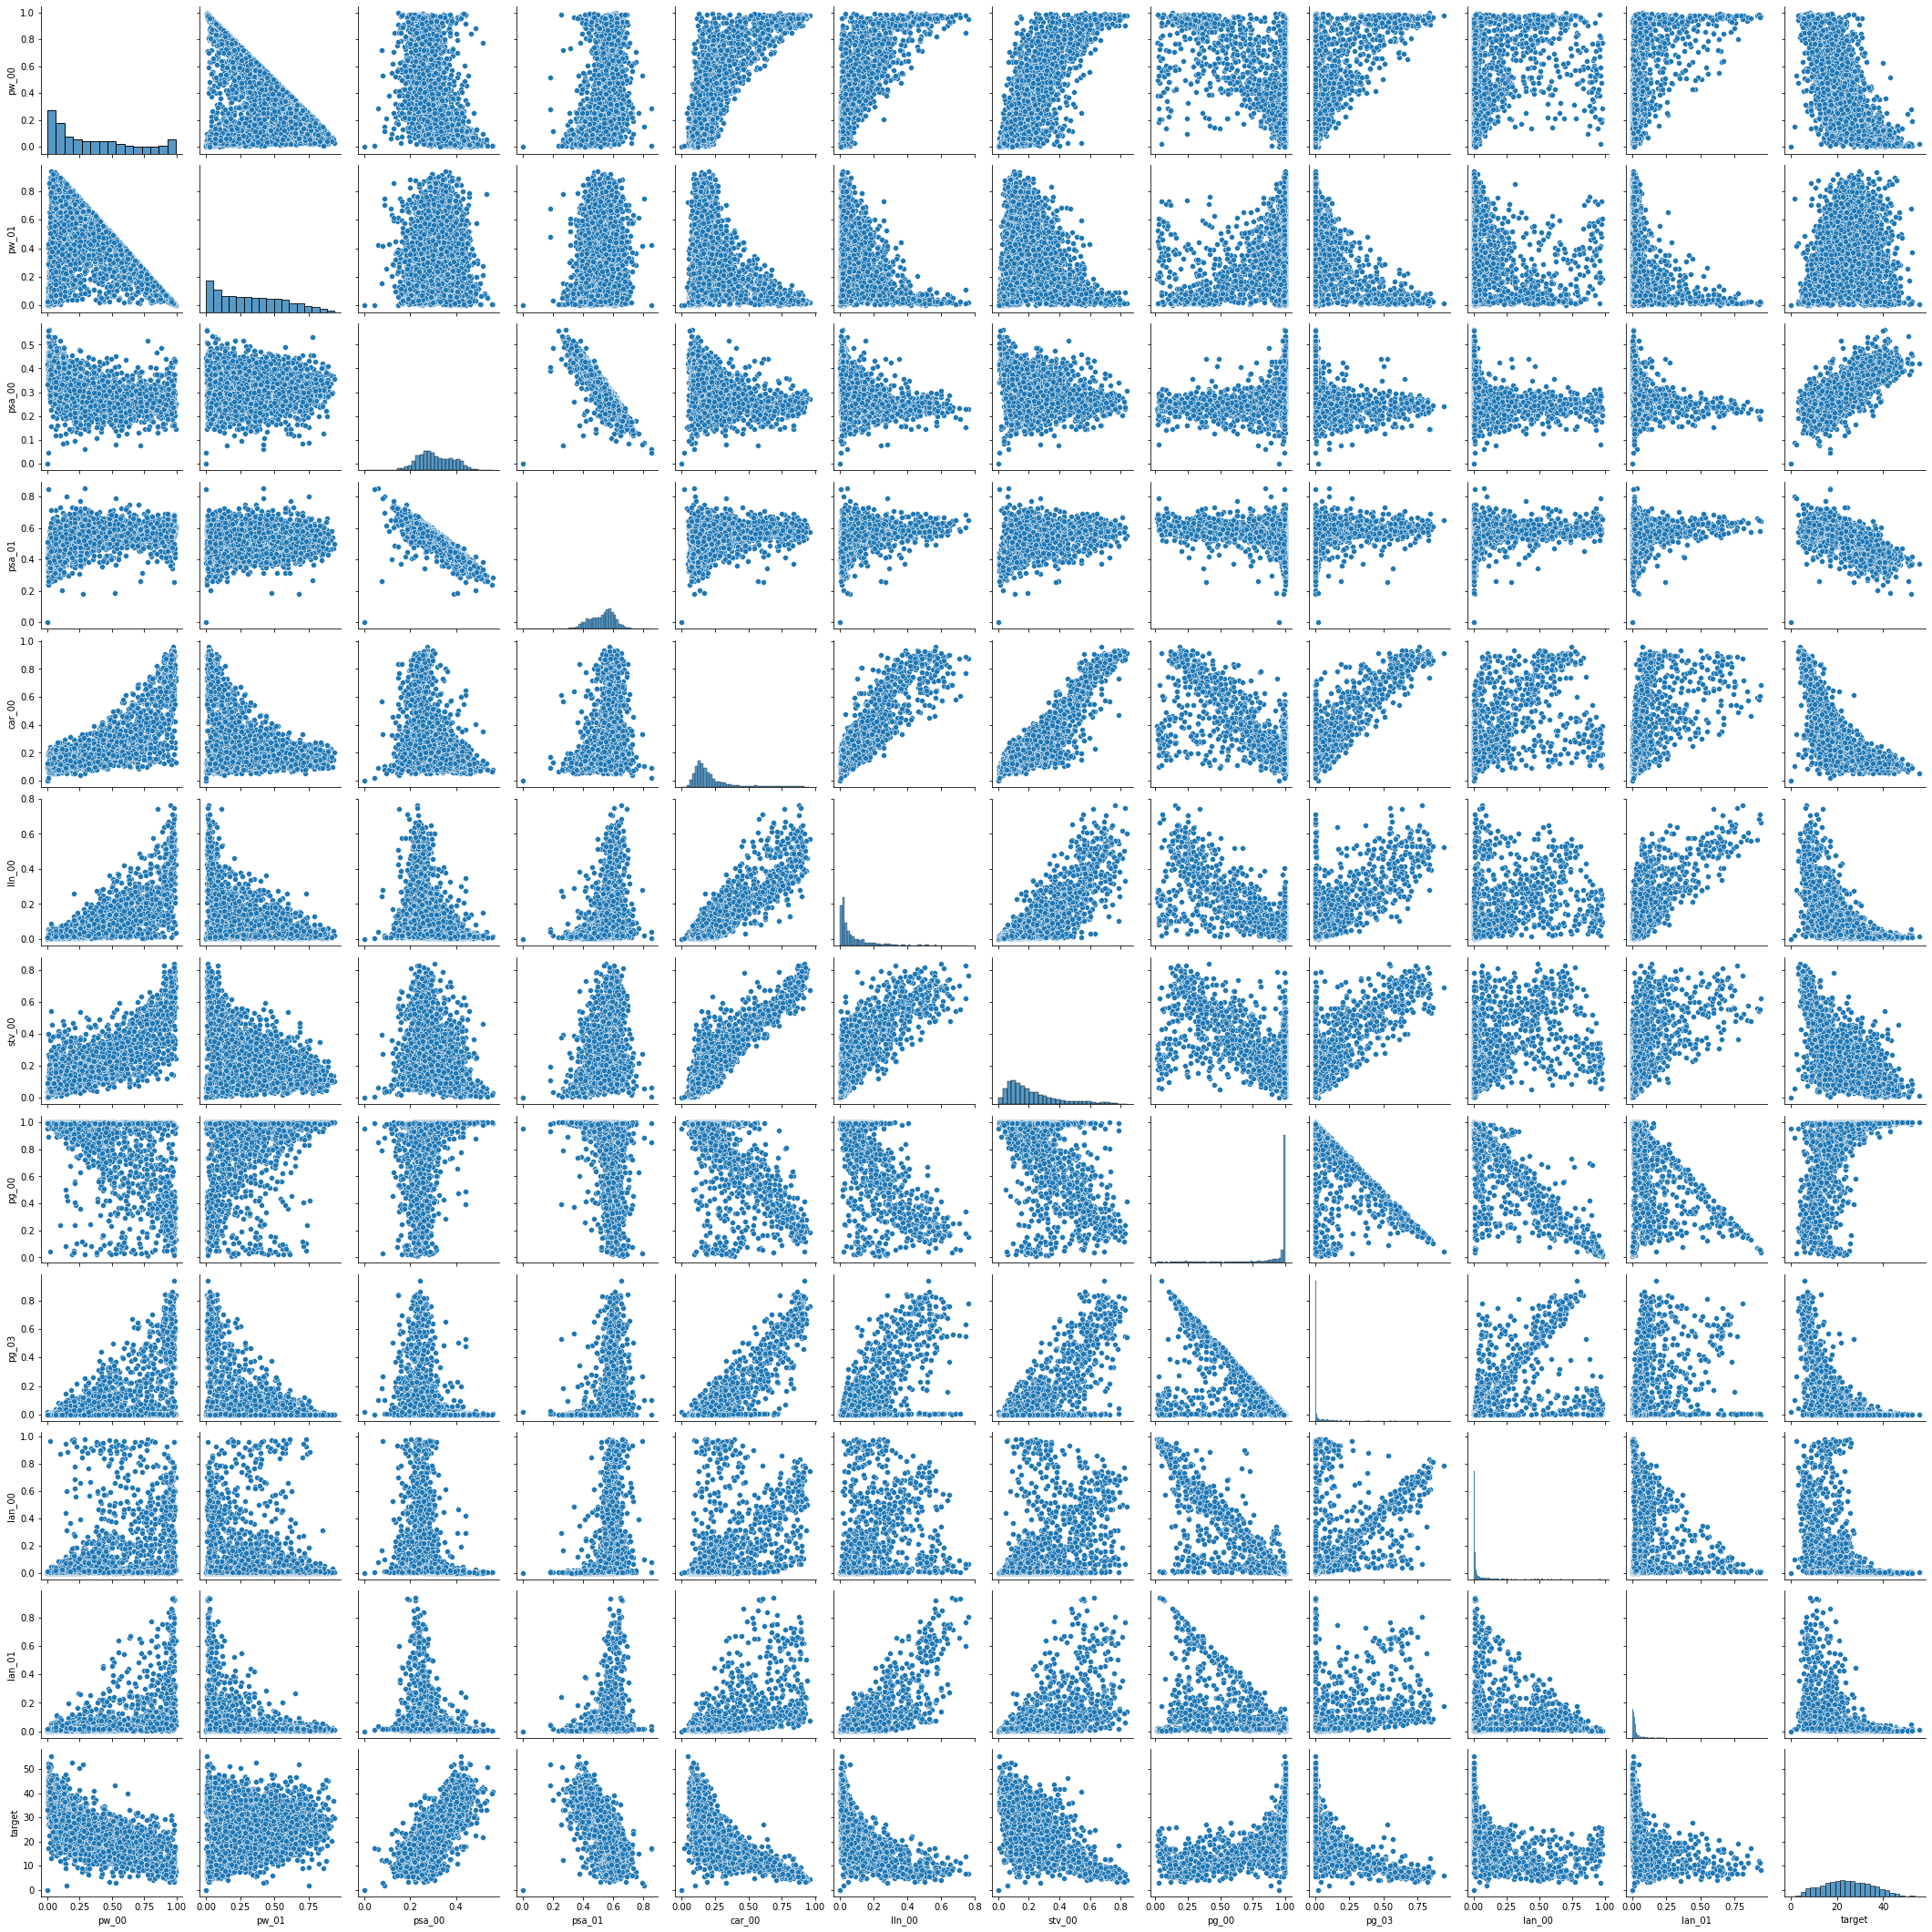

In [14]:
# show the pairplot to check distributions
sns.pairplot(df_final)

In [11]:
# transform the data
def convert_zeros(x):
    '''
    function to convert zeros to a postive number 
    so that it can be transformed with the boxcox'''
    if x == 0.0:
        return 0.0000001
    else :
        return x


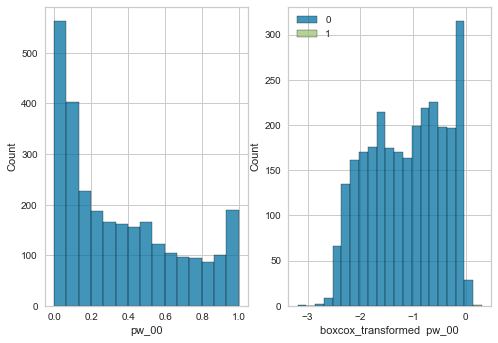

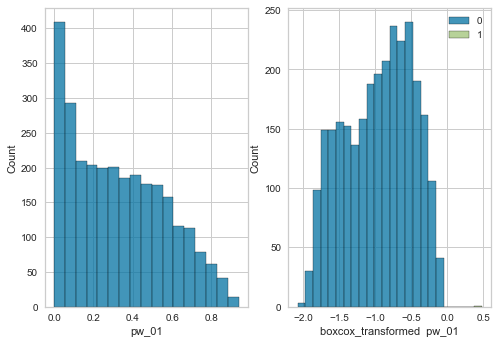

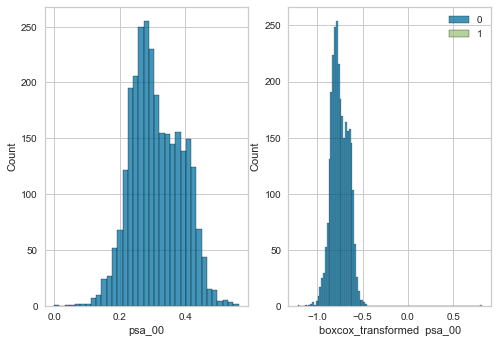

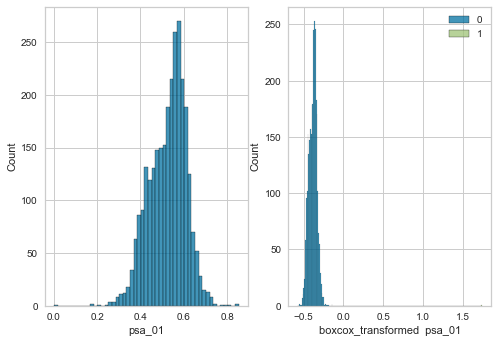

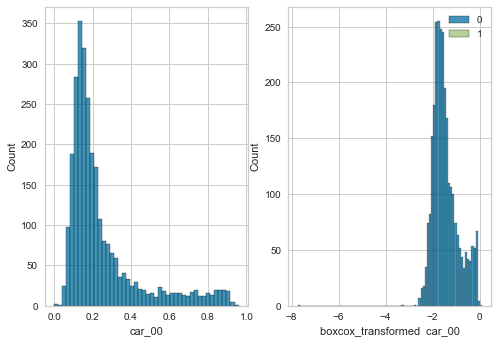

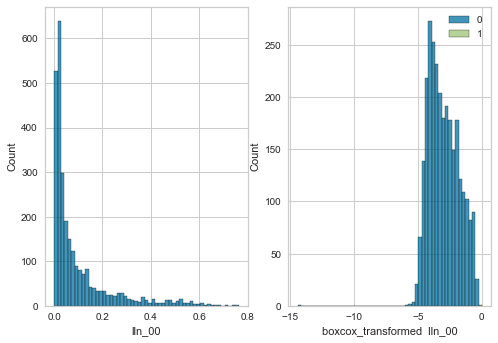

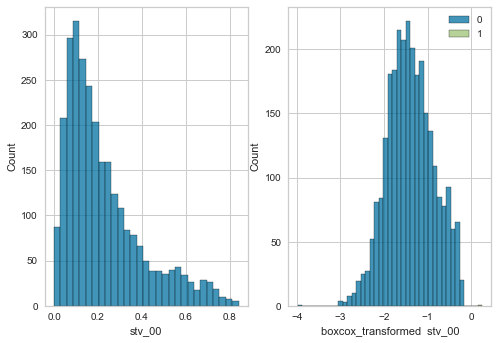

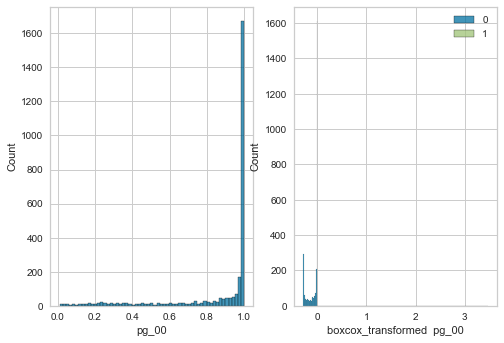

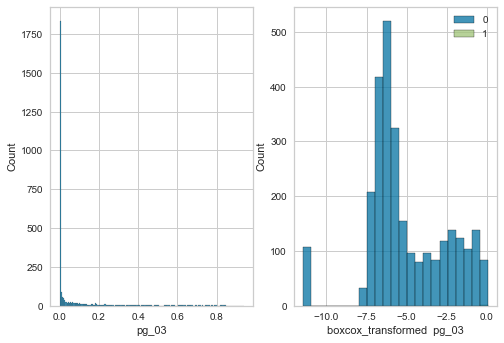

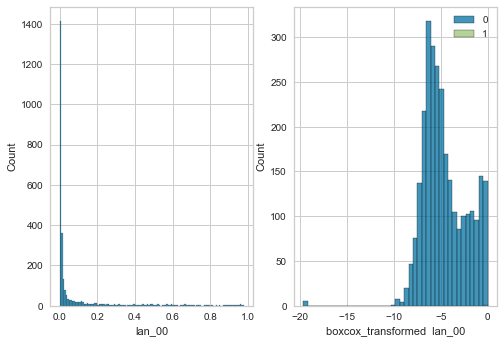

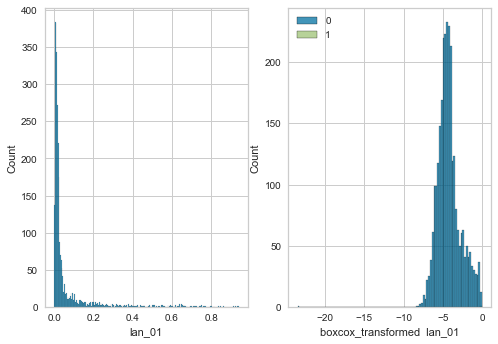

In [32]:
# Check log-transformation
for col in feature_list:
    if col != 'target':
        fig, axes = plt.subplots(1,2)
        df_final[col] = df_final[col].apply(convert_zeros)
        sns.histplot(df_final[col], ax=axes[0])
        plt.xlabel(col)
        sns.histplot(boxcox(df_final[col]), ax=axes[1])
        plt.xlabel('boxcox_transformed  ' + col)

In [33]:
# apply the logtransformation on 

for col in feature_list:
    if col != 'target' and  col != 'psa_00' and  col != 'psa_01' and col != 'car_00' and col != 'pg_00':
        #df_final[col] = df_final[col].apply(convert_zeros)
        df_final[col] = boxcox(df_final[col])[0].reshape(-1,1);

In [34]:
df_final.head()

,pw_00,pw_01,psa_00,psa_01,car_00,lln_00,stv_00,pg_00,pg_03,lan_00,lan_01,target
0,-0.284113,-1.089386,0.260191,0.607898,0.273727,-2.098567,-1.083683,0.357455,-2.468668,-0.183226,-4.848608,16.773757
1,-0.982978,-0.483537,0.290228,0.549788,0.144638,-2.653801,-1.736930,0.698428,-3.780784,-0.128422,-5.312215,21.496661
2,-0.951828,-0.613690,0.186435,0.677005,0.272220,-2.265679,-1.452065,0.672452,-1.716657,-0.573863,-4.535601,10.931425
3,-0.366754,-0.888237,0.281229,0.593281,0.127875,-3.448817,-1.830113,0.728014,-5.967212,-0.297017,-5.631192,23.119257
4,-0.249689,-1.133434,0.196687,0.517578,0.404507,-1.985076,-0.933968,0.753491,-2.126300,-0.870200,-4.665611,13.652252


In [35]:
# do the cross validation manually
from sklearn.model_selection import KFold

# Using this to test a model on 5 different splits
kf = KFold(n_splits=5, shuffle=False)

ycol = 'target'
in_cols = feature_list[:-1]

scores = []
for train, test in kf.split(df_final):
  lr = LinearRegression()
  lr.fit(df_final[in_cols].iloc[train], df_final[ycol].iloc[train])
  rmse = np.sqrt(mean_squared_error(df_final[ycol].iloc[test], lr.predict(df_final[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)

print("Average score in 5-fold CV:", np.mean(scores))

4.3773274364386765
4.25694325744087
4.954149848169194
4.705172984499461
5.771930965606469
Average score in 5-fold CV: 4.813104898430934


In [36]:
# Train test split with same random seed
# Defining X and y
features = df_final.columns.tolist()
features.remove('target')
X = df_final[features]
y = df_final.target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=150, shuffle=True)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (2116, 11)
y_train: (2116,)
X_test: (706, 11)
y_test: (706,)


In [37]:
# do the cross validation with grid search
# Grid search for Linear Regression

# Defining parameter grid (as dictionary)
param_grid = {"fit_intercept" : [True, False],
              "normalize" : [True, False]
             }

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(LinearRegression(), param_grid, cv=5, verbose=0, n_jobs=-1)

# Fit gridsearch object to data
gs.fit(X_train, y_train)

/Users/corinna/neuefische/urban-eureka/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/corinna/neuefische/urban-eureka/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimato

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [38]:
# Evaluate the model (Multiple Linear Regression) --> Grid search
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: 0.821
Best parameters: {'fit_intercept': False, 'normalize': True}


In [39]:
# Predict
y_pred = gs.predict(X_test)

# Evaluate the model (Multiple Linear Regression) (Grid Search)

# predicting the model fit
score = r2_score(y_test, y_pred)
print("r2 score is ", round(score, 2))
print("mean_sqrd_error is:", round(mean_squared_error(y_test, y_pred), 2))
print("root_mean_squared error is:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))

r2 score is  0.81
mean_sqrd_error is: 19.36
root_mean_squared error is: 4.4


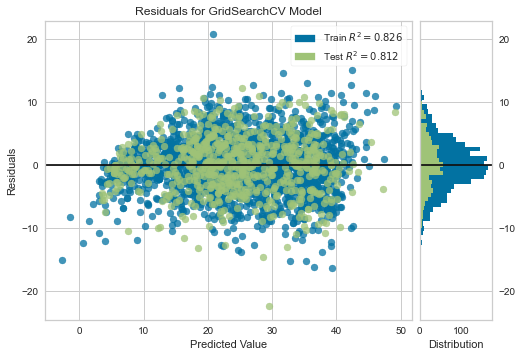

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [40]:
# Plot the errors
from yellowbrick.regressor import ResidualsPlot

#visualizer = ResidualsPlot(gs, hist=False, qqplot=True)
visualizer = ResidualsPlot(gs)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()